In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, train_test_split
import tensorflow as tf
from keras.models import model_from_json
from keras.layers import Dropout

In [60]:
df=pd.read_csv("BankNote_Authentication.csv")
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [61]:
features=["variance","skewness","curtosis","entropy"]
X=df[features]
y=df["class"] # already labeled

# Split dataset to train and test set 75%-25%
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25,random_state=0)

In [77]:
def create_nn():
    '''
    Creates simple Multilayer perceptron model.
    '''
    # model Layers
    model=Sequential()
    model.add(Dropout(0.2, input_shape=(4,)))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    
    #Compile model
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=["accuracy"])
    return model

In [78]:
# Scaling
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [79]:
model=create_nn()
print(model.summary())

# 97= (16 * (4+1) + 1 * (16+1))

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_4 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               640       
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 65        
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________
None


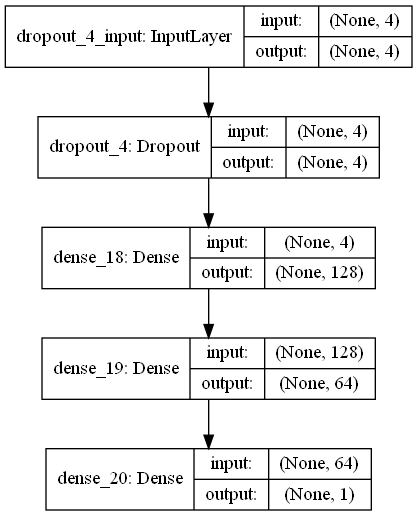

In [80]:
tf.keras.utils.plot_model(model,show_shapes=True,show_layer_names=True)

In [81]:
model.fit(X_train,y_train,epochs=50,batch_size=5,verbose=2)

Epoch 1/50
 - 0s - loss: 0.3074 - accuracy: 0.8581
Epoch 2/50
 - 0s - loss: 0.1874 - accuracy: 0.9232
Epoch 3/50
 - 0s - loss: 0.2027 - accuracy: 0.9155
Epoch 4/50
 - 0s - loss: 0.2021 - accuracy: 0.9135
Epoch 5/50
 - 0s - loss: 0.1997 - accuracy: 0.9096
Epoch 6/50
 - 0s - loss: 0.2144 - accuracy: 0.9096
Epoch 7/50
 - 0s - loss: 0.1837 - accuracy: 0.9213
Epoch 8/50
 - 0s - loss: 0.1911 - accuracy: 0.9232
Epoch 9/50
 - 0s - loss: 0.1865 - accuracy: 0.9213
Epoch 10/50
 - 0s - loss: 0.1753 - accuracy: 0.9261
Epoch 11/50
 - 0s - loss: 0.1593 - accuracy: 0.9339
Epoch 12/50
 - 0s - loss: 0.1803 - accuracy: 0.9232
Epoch 13/50
 - 0s - loss: 0.1881 - accuracy: 0.9223
Epoch 14/50
 - 0s - loss: 0.1833 - accuracy: 0.9184
Epoch 15/50
 - 0s - loss: 0.1842 - accuracy: 0.9155
Epoch 16/50
 - 0s - loss: 0.1625 - accuracy: 0.9291
Epoch 17/50
 - 0s - loss: 0.1731 - accuracy: 0.9213
Epoch 18/50
 - 0s - loss: 0.1842 - accuracy: 0.9203
Epoch 19/50
 - 0s - loss: 0.1711 - accuracy: 0.9252
Epoch 20/50
 - 0s - l

In [82]:
score=model.evaluate(X_test,y_test)
print("Model accuracy: {}\nModel loss: {}".format(score[1],score[0]))

343/343 [==============================] - 0s 134us/step
Model accuracy: 0.9970845580101013
Model loss: 0.03502017462696695


Because of the quality (not evaluated) and size of the data we can reach 100% accuracy on train and test sets.

In [83]:
# SAVE MODEL to reuse
model.save("model.h5")

In [90]:
# from keras.models import load_model

# model2 = load_model('model.h5')
# model2.evaluate(X_test,y_test)

343/343 [==============================] - 0s 163us/step


[0.03502017462696695, 0.9970845580101013]